#### Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv ("/Users/vaishnaviet/Downloads/wine (3).csv")

#### Displaying the first two records

In [4]:
df.head(2)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


## Step-1 
## Preproceessing the data

#### Assigning the column names

In [5]:
df.columns = [  'class'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'alcalinityofash'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'color Intensity'
             	,'hue'
             	,'od280/od315'
             	,'proline'
                ]


#### Displaying the dataset after inserting the column names

In [6]:
df.head(2)

,class,alcohol,malicAcid,ash,alcalinityofash,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,color Intensity,hue,od280/od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


#### Checking the count of different instances in each class

In [7]:
df['class'].value_counts()

2    71
1    58
3    48
Name: class, dtype: int64

#### Checking for null values

In [8]:
df.isnull().sum()

class                  0
alcohol                0
malicAcid              0
ash                    0
alcalinityofash        0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
color Intensity        0
hue                    0
od280/od315            0
proline                0
dtype: int64

In [9]:
random.seed(10)

#### Corelation of the data

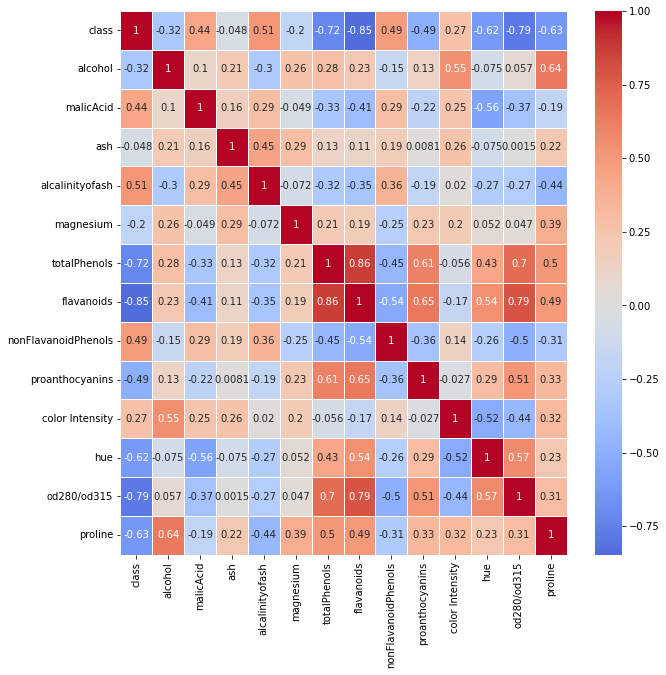

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

#### Univariate Anaysis of the variables

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malicAcid'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'alcalinityofash'}>,
        <AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'totalPhenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>],
       [<AxesSubplot:title={'center':'nonFlavanoidPhenols'}>,
        <AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color Intensity'}>,
        <AxesSubplot:title={'center':'hue'}>],
       [<AxesSubplot:title={'center':'od280/od315'}>,
        <AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

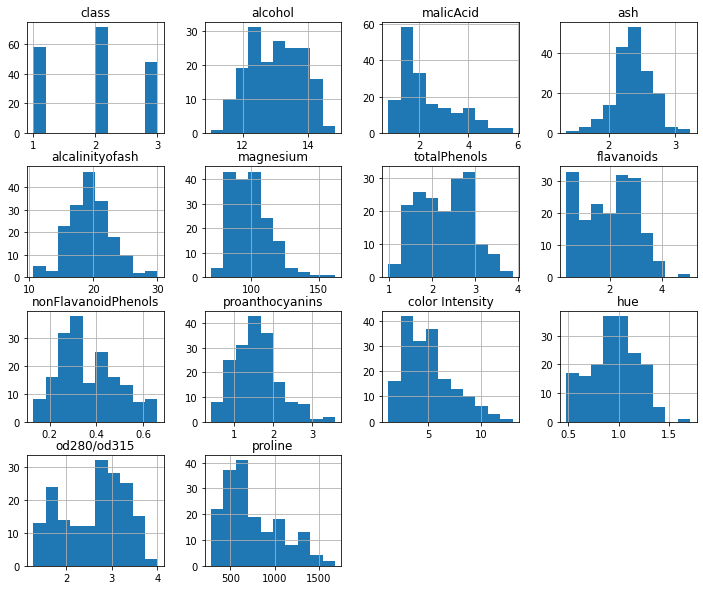

In [11]:
df.hist(figsize=(12,10)) 

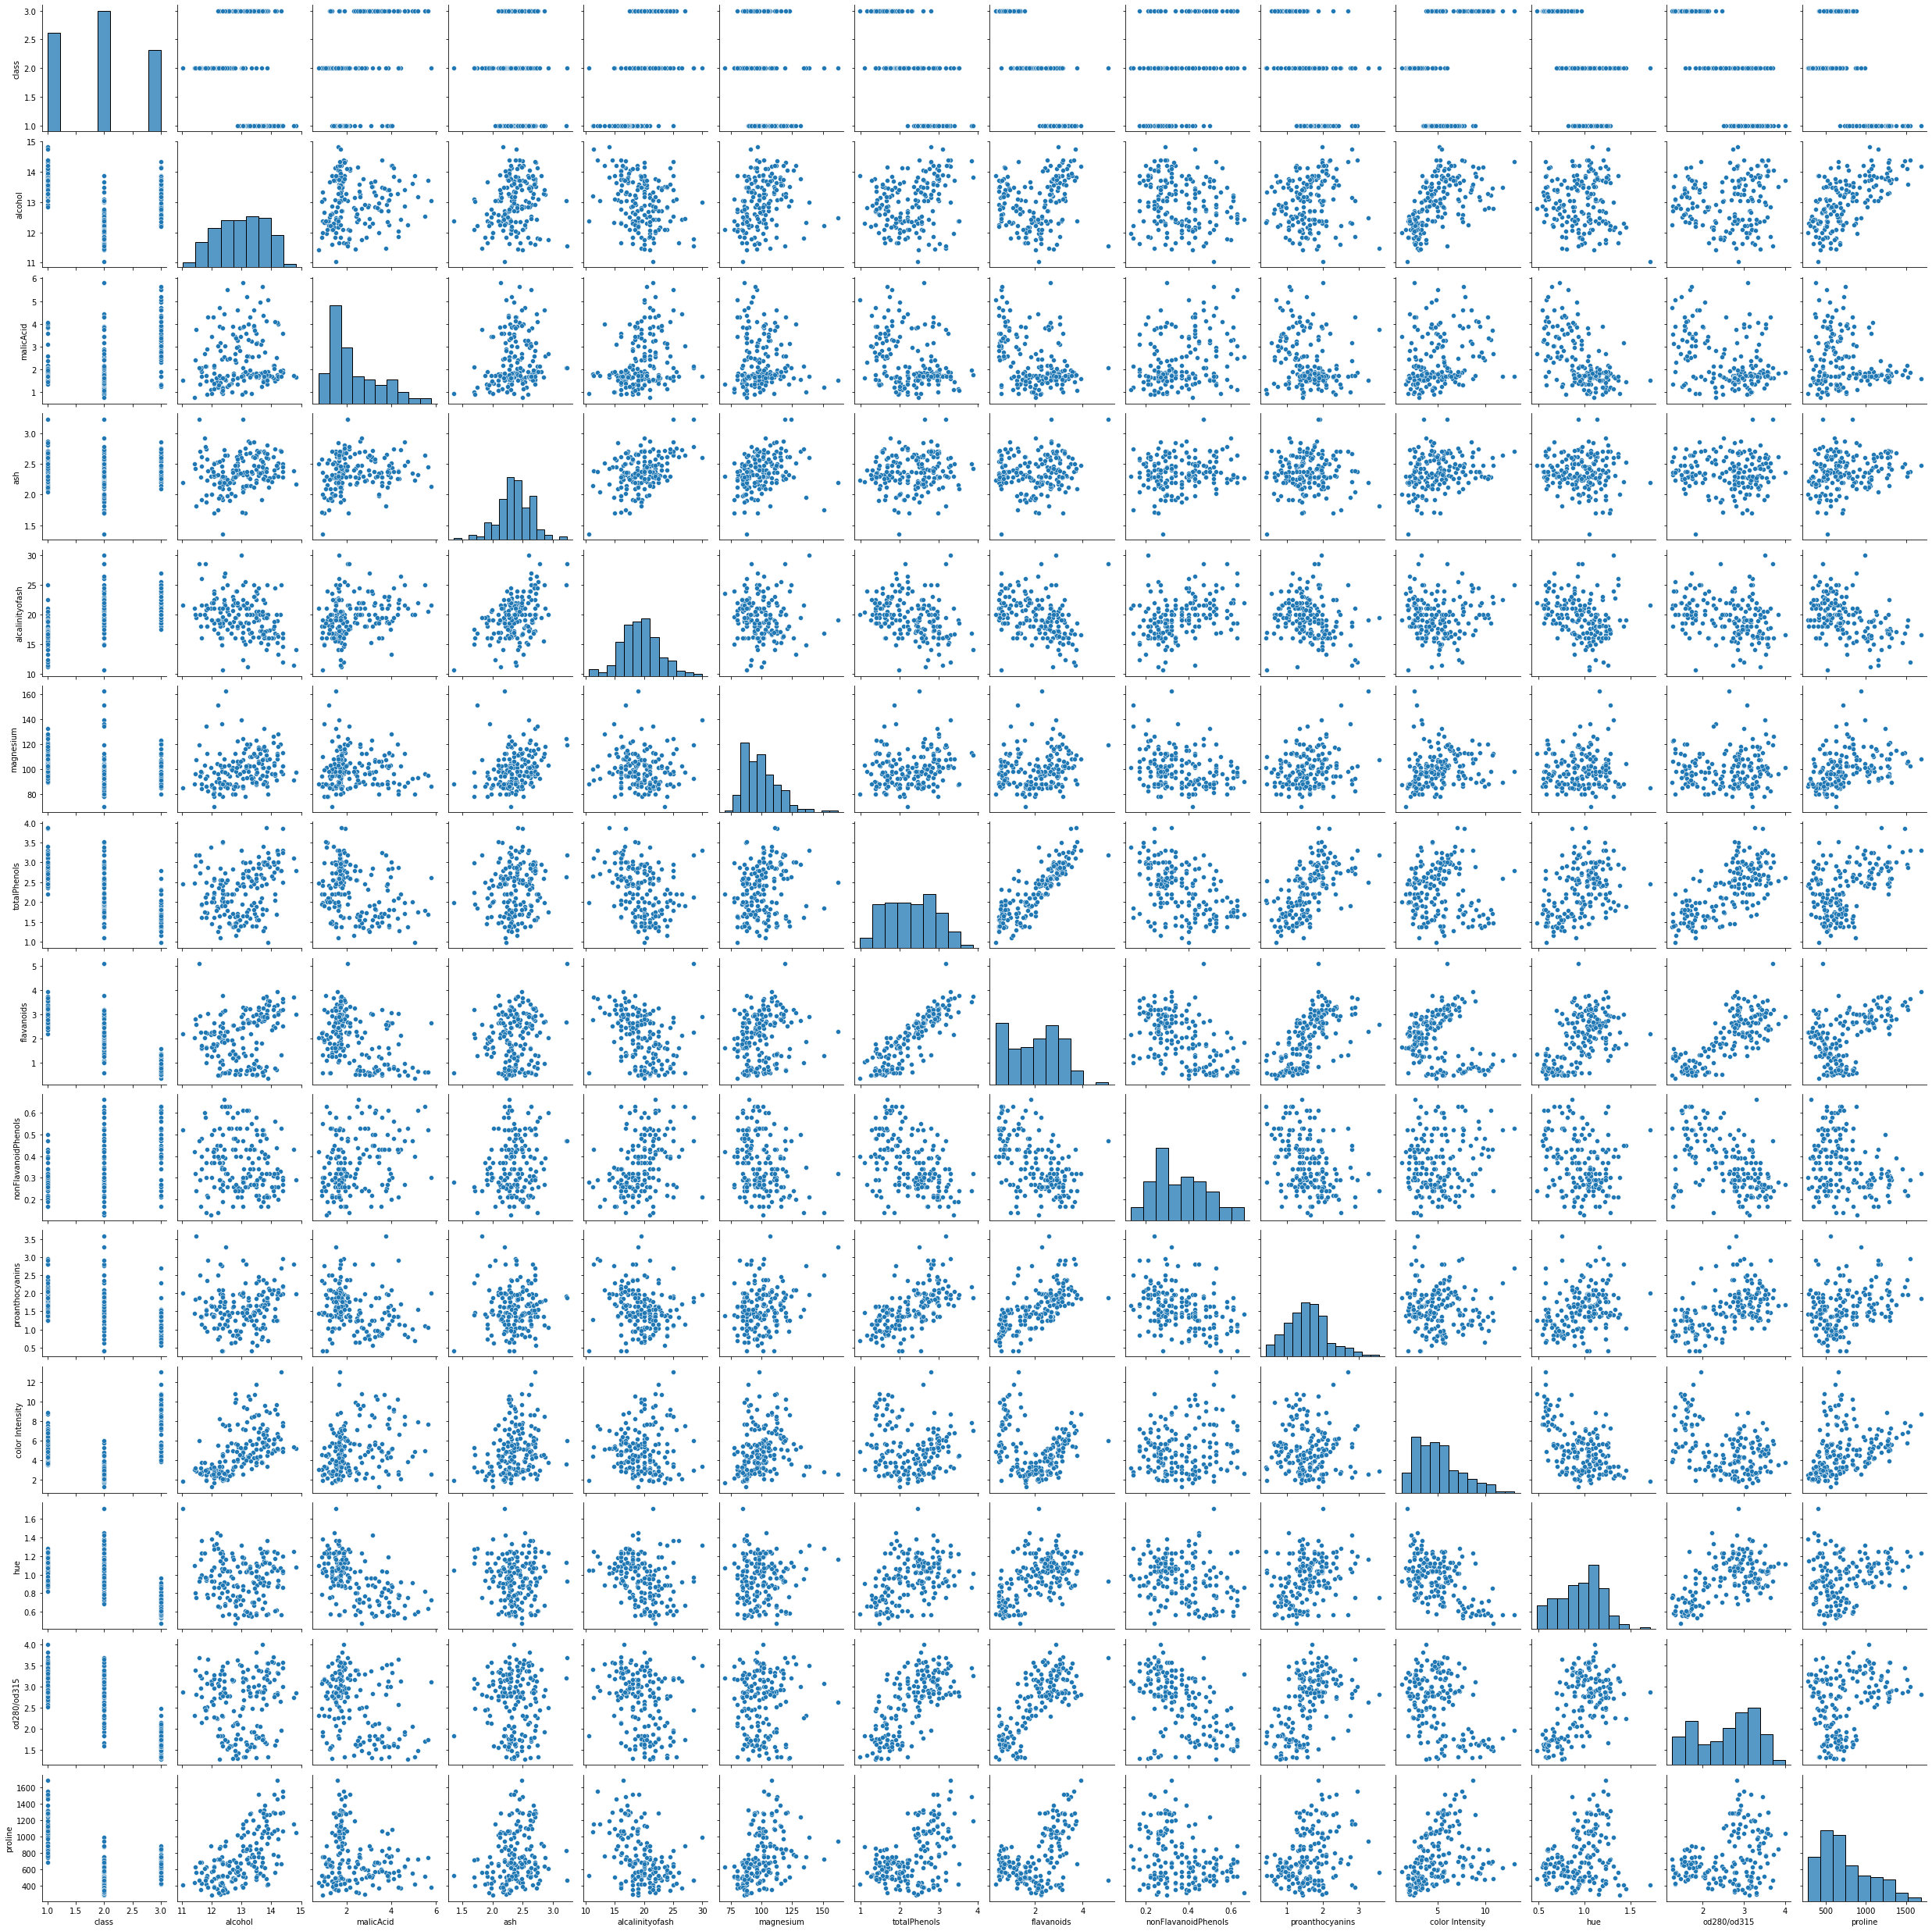

In [12]:
sns.pairplot(df)

#### Converting pandas dataframe into Numpy Arrays

In [13]:
df_array = df.to_numpy()
print (df_array)

[[1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 [1.000e+00 1.437e+01 1.950e+00 ... 8.600e-01 3.450e+00 1.480e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


## Step 2: 
## Applying techniques

#### Divinding the data into training set i.e 75% and testing test i.e 25%

In [14]:
#Y = df['class']
#Y = pd.DataFrame(Y)
features = list(df.columns[1:14])
features
X = df[features]
Y = df["class"]

In [15]:
#X= df.iloc[:,1:14]
#X = pd.DataFrame(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=1)

### Technique -1  
### Decision Tree

In [20]:
DecisionTree_classifier = DecisionTreeClassifier()
DecisionTree_classifier= DecisionTree_classifier.fit(X_train,Y_train)
DecisionTree_classifier_y_pred = DecisionTree_classifier.predict(X_test)
print('Accuracy of decision Tree Classifier: ', metrics.accuracy_score(Y_test,DecisionTree_classifier_y_pred)*100,'%')

Accuracy of decision Tree Classifier:  88.88888888888889 %


##### 10 fold cross validation for decision tree

In [21]:
print('Mean accuracy of 10 fold for DecisionTree: ',np.mean(cross_val_score(DecisionTree_classifier, X, Y, cv=10)) * 100,'%')

Mean accuracy of 10 fold for DecisionTree:  90.49019607843137 %


### Technique -2 
### Random forest

In [22]:
Random_Forest_classifier = RandomForestClassifier(n_estimators=100)
Random_Forest_classifier.fit(X_train,Y_train)
Random_Forest_classifier_y_pred = Random_Forest_classifier.predict(X_test)
print('Accuracy of Random forest Classifier: ', metrics.accuracy_score(Y_test,Random_Forest_classifier_y_pred)*100,'%')

Accuracy of Random forest Classifier:  97.77777777777777 %


##### 10 fold cross validation for random forest

In [23]:
print('Mean accuracy of 10 fold for RandomForest: ',np.mean(cross_val_score(Random_Forest_classifier, X, Y, cv=10)) * 100,'%')

Mean accuracy of 10 fold for RandomForest:  98.33333333333331 %


### Conclusion drawn 
#### On comparing the accuarcy rates of Decision tree and Random Forest ,we can say that Random forest performs better than Decision tree.

### Technique - 3 
### K Nearest Neighbour

In [24]:
KNN_classifiier = KNeighborsClassifier(n_neighbors=10)
KNN_classifiier= KNN_classifiier.fit(X_train,Y_train)
KNN_classifiier_y_pred = KNN_classifiier.predict(X_test)
print('Accuracy of decision Tree Classifier: ', metrics.accuracy_score(Y_test,KNN_classifiier_y_pred)*100,'%')


Accuracy of decision Tree Classifier:  71.11111111111111 %


#### checking accuracy for different values of k

In [25]:
for k in range(1,50):
   print('Accuracy score for the value of k = ',k,'is: ',accuracy_score(Y_test, KNN_classifiier_y_pred))


Accuracy score for the value of k =  1 is:  0.7111111111111111
Accuracy score for the value of k =  2 is:  0.7111111111111111
Accuracy score for the value of k =  3 is:  0.7111111111111111
Accuracy score for the value of k =  4 is:  0.7111111111111111
Accuracy score for the value of k =  5 is:  0.7111111111111111
Accuracy score for the value of k =  6 is:  0.7111111111111111
Accuracy score for the value of k =  7 is:  0.7111111111111111
Accuracy score for the value of k =  8 is:  0.7111111111111111
Accuracy score for the value of k =  9 is:  0.7111111111111111
Accuracy score for the value of k =  10 is:  0.7111111111111111
Accuracy score for the value of k =  11 is:  0.7111111111111111
Accuracy score for the value of k =  12 is:  0.7111111111111111
Accuracy score for the value of k =  13 is:  0.7111111111111111
Accuracy score for the value of k =  14 is:  0.7111111111111111
Accuracy score for the value of k =  15 is:  0.7111111111111111
Accuracy score for the value of k =  16 is:  0.71

#### perfoming 10 fold cross validation for different values of k

In [26]:
for k in range(1,50):
    print(' Accuracy for the value of k =  ',k,'is: ',np.mean(cross_val_score(KNN_classifiier, X, Y, cv=10)))

 Accuracy for the value of k =   1 is:  0.7006535947712418
 Accuracy for the value of k =   2 is:  0.7006535947712418
 Accuracy for the value of k =   3 is:  0.7006535947712418
 Accuracy for the value of k =   4 is:  0.7006535947712418
 Accuracy for the value of k =   5 is:  0.7006535947712418
 Accuracy for the value of k =   6 is:  0.7006535947712418
 Accuracy for the value of k =   7 is:  0.7006535947712418
 Accuracy for the value of k =   8 is:  0.7006535947712418
 Accuracy for the value of k =   9 is:  0.7006535947712418
 Accuracy for the value of k =   10 is:  0.7006535947712418
 Accuracy for the value of k =   11 is:  0.7006535947712418
 Accuracy for the value of k =   12 is:  0.7006535947712418
 Accuracy for the value of k =   13 is:  0.7006535947712418
 Accuracy for the value of k =   14 is:  0.7006535947712418
 Accuracy for the value of k =   15 is:  0.7006535947712418
 Accuracy for the value of k =   16 is:  0.7006535947712418
 Accuracy for the value of k =   17 is:  0.700653

##### since the accuracy is very less, preprocessing of the data is done again

In [27]:
s_s = StandardScaler()
train_x=s_s.fit_transform(X_train)
test_x=s_s.fit_transform(X_test)
X1 = s_s.fit_transform(X)


In [28]:
KNN = KNeighborsClassifier (n_neighbors=10,p=1)
KNN.fit(train_x,Y_train)
y_pred_KNN=KNN.predict(test_x)
print('percentage Accuracy using KNN is : ',100*accuracy_score(Y_test,y_pred_KNN),'%')

percentage Accuracy using KNN is :  95.55555555555556 %


#### checking highest accuarcy in 10 fold cross validation for different values of K

In [29]:
for k in range(1,50):
    KNN = KNeighborsClassifier (n_neighbors=k)
    KNN.fit(train_x,Y_train)
    y_pred_KNN=KNN.predict(test_x)
    print(' Accuracy at 10 fold cross validation at k = ',k,'is: ',np.mean(cross_val_score(KNN, X1, Y, cv=10)))

 Accuracy at 10 fold cross validation at k =  1 is:  0.9434640522875817
 Accuracy at 10 fold cross validation at k =  2 is:  0.9379084967320261
 Accuracy at 10 fold cross validation at k =  3 is:  0.9545751633986927
 Accuracy at 10 fold cross validation at k =  4 is:  0.9490196078431372
 Accuracy at 10 fold cross validation at k =  5 is:  0.9663398692810456
 Accuracy at 10 fold cross validation at k =  6 is:  0.9549019607843137
 Accuracy at 10 fold cross validation at k =  7 is:  0.9607843137254901
 Accuracy at 10 fold cross validation at k =  8 is:  0.9663398692810456
 Accuracy at 10 fold cross validation at k =  9 is:  0.9774509803921569
 Accuracy at 10 fold cross validation at k =  10 is:  0.9718954248366012
 Accuracy at 10 fold cross validation at k =  11 is:  0.9715686274509803
 Accuracy at 10 fold cross validation at k =  12 is:  0.9607843137254901
 Accuracy at 10 fold cross validation at k =  13 is:  0.9663398692810456
 Accuracy at 10 fold cross validation at k =  14 is:  0.9666

#### From the above result we can say that the accuarcy is 98% when the value of k is 23

### Technique - 4 
### Naive Bayes 

### Multinomial NB

In [30]:
NB_Multi_classifier = MultinomialNB()
NB_Multi_classifier.fit(X_train, Y_train)
NB_Multi_classifier_pred = NB_Multi_classifier.predict(X_test)
print('Accuracy of Multinomial Naive Bayes Classifier: ', metrics.accuracy_score(Y_test,NB_Multi_classifier_pred)*100,'%')

Accuracy of Multinomial Naive Bayes Classifier:  82.22222222222221 %


##### Using 10 fold cross validation for Multinomial NB

In [31]:
print('Mean accuracy of 10 fold for Naive Bayes Classifier ',np.mean(cross_val_score(NB_Multi_classifier, X,Y, cv=10))*100,'%')

Mean accuracy of 10 fold for Naive Bayes Classifier  84.9673202614379 %


### GaussianNB 

In [32]:
NB_gaussian_classifier = GaussianNB()
NB_gaussian_classifier.fit(X_train, Y_train)
NB_gaussian_classifier_pred = NB_gaussian_classifier.predict(X_test)
print('Accuracy of Gaussain Naive Bayes Classifier: ', metrics.accuracy_score(Y_test,NB_gaussian_classifier_pred)*100,'%')

Accuracy of Gaussain Naive Bayes Classifier:  95.55555555555556 %


##### Using 10 fold cross validation for Gaussian NB

In [33]:
print('Mean accuracy of 10 fold for Gaussian Naive bayes: ',np.mean(cross_val_score(NB_gaussian_classifier, X,Y, cv=10)) * 100,'%')

Mean accuracy of 10 fold for Gaussian Naive bayes:  97.74509803921568 %


#### Gaussian NB performs better than Multinomial NB 
#### Accuracy of Multinomail NB is 84% where as accuracy of Gaussian NB is 97%

### Technique - 5 
### SVM

In [34]:
SVC_classifier = SVC(random_state = 2020)
SVC_classifier.fit(train_x, Y_train)
SVC_classifier_y_pred = SVC_classifier.predict(test_x)
print('Accuracy of SVC Classifier: ', metrics.accuracy_score(Y_test,SVC_classifier_y_pred)*100)

Accuracy of SVC Classifier:  91.11111111111111


#### 10 fold cross validation for SVC

In [35]:
print('Mean accuracy of 10 fold for SVC: ',np.mean(cross_val_score(SVC_classifier, X1,Y, cv=10)) *100 ,'%')

Mean accuracy of 10 fold for SVC:  97.77777777777779 %


#### checking the accuracy for different kernels

In [36]:
models=[LinearSVC(dual=False),SVC(kernel = 'rbf', random_state = 0),SVC(kernel = 'poly', random_state = 0, degree = 3),SVC(kernel = 'sigmoid', random_state = 0),
        ]

model_names=['LinearSVM','rbfSVM','polySVM','sigmoidSVM']
acc=[]
d={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(train_x,Y_train)
    pred=clf.predict(test_x)
    acc.append(accuracy_score(pred,Y_test))
     
d={'Model':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame

,Model,Accuracy
0,LinearSVM,0.955556
1,rbfSVM,0.911111
2,polySVM,0.888889
3,sigmoidSVM,0.933333


#### checking the accuracy for different kernels through 10 fold cross validation

In [37]:
models=[LinearSVC(dual=False),SVC(kernel = 'rbf', random_state = 0),SVC(kernel = 'poly', random_state = 0, degree = 3),SVC(kernel = 'sigmoid', random_state = 0),
        ]
acc = []
model_names=['LinearSVM','rbfSVM','polySVM','sigmoidSVM']
d={}
for model in range(len(models)):
    clf1=models[model]
    clf1.fit(train_x,Y_train)
    pred1=clf1.predict(train_x)
    acc.append(np.mean(cross_val_score(clf1, X1, Y, cv=10)))
     
d={'Model':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame

,Model,Accuracy
0,LinearSVM,0.977778
1,rbfSVM,0.977778
2,polySVM,0.943791
3,sigmoidSVM,0.983333


#### from the above result we can conclude that Sigmoid SVM has higher accuracy.

### Conclusions drawn:

1. Random Forest has better accuracy than Decision Tree.
2. K = 23 fetches higher accuracy than any other value of K in KNN.
3. Gaussian NB has higher accuracy than Multinomial NB.
4. Sigmoid SVM has higher accuracy.